In [2]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

4.	Using the pandas `read_csv()` method.
Read the GDP dataset into your notebook as a DataFrame called `gdp_df`.
Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [144]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv',nrows = 7662)

In [146]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`?  347 rows.
What are the data types of each column? answer below.

In [149]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [152]:
## Drop the Value Footnotes ANSWER:

In [154]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [156]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [158]:
## Rename columns ANSWER:

In [229]:
gdp_df.columns = ['Country','Year','GDP_Per_Capita']

##########################################################################################################################################################################

##########################################################################################################################################################################

7. How many countries have data for all years?
Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

ANSWERS:
How many countries have data for all years?  198

Which countries are missing many years of data?  40

Look at the number of observations per year. What do you notice?  

count 	238.000000
mean 	31.638655
std 	3.957008
min 	10.000000
25% 	33.000000
50% 	33.000000
75% 	33.000000
max 	33.000000


##########################################################################################################################################################################

In [164]:
# what I want is a list of all of the countries that have a higher total count of less than the max and equal to the max.

In [166]:
gdp_df_count = gdp_df.Country.value_counts().reset_index().sort_values(by = 'count')                  

In [168]:
# max count of different years for any country.

gdp_df_count_max = gdp_df_count['count'].max()

In [170]:
gdp_df_count_max

33

In [172]:
# gdp_df_all_years = all countries that have > 32 counts of years.

gdp_df_all_years = (gdp_df['Country'].value_counts()) >32
print(gdp_df_all_years)


Country
Least developed countries: UN classification     True
Middle East & North Africa                       True
Middle East & North Africa (IDA & IBRD)          True
Middle income                                    True
Mongolia                                         True
                                                ...  
Kosovo                                          False
Sint Maarten (Dutch part)                       False
Turks and Caicos Islands                        False
Somalia                                         False
Djibouti                                        False
Name: count, Length: 242, dtype: bool


In [174]:
# turned the gdp_df_all_years series into a dataframe.

gdp_df_all_years = gdp_df_all_years.to_frame()


In [178]:
# resets index for gdp_df_all_years.

gdp_df_all_years = gdp_df_all_years.reset_index()

In [182]:
# Created gdp_df_all_years_true_only.  Only has countries that had True in the count column.

gdp_df_all_years_true_only = gdp_df_all_years.loc[gdp_df_all_years['count']==True]

In [186]:
# Get rid of the first 4 rows (0 - 3) in gdp_df_all_years_true_only.

gdp_df_all_years_true_only = gdp_df_all_years_true_only.iloc[4:]

In [190]:
# reset index

gdp_df_all_years_true_only = gdp_df_all_years_true_only.reset_index()

In [194]:
#  get a total count of all the rows in gdp_df_all_years_true_only.

gdp_df_all_years_true_only = gdp_df_all_years_true_only['count'].value_counts()

In [205]:
#  FORMULA FOR HOW MANY COUNTIRES HAVE ALL YEARS IN THE DF.

gdp_df_all_years_true_only

count
True    198
Name: count, dtype: int64

In [211]:
# Created gdp_df_all_years_false_only.  Only has countries that had false in the count column.

gdp_df_all_years_false_only = gdp_df_all_years.loc[gdp_df_all_years['count']== False]

In [215]:
# reset index

gdp_df_all_years_false_only = gdp_df_all_years_false_only.reset_index()

In [219]:
#  get a total count of all the rows in gdp_df_all_years_false_only.

gdp_df_all_years_false_only = gdp_df_all_years_false_only['count'].value_counts()

In [221]:
#  FORMULA FOR HOW MANY COUNTIRES DON'T HAVE ALL YEARS IN THE DF.

gdp_df_all_years_false_only

count
False    40
Name: count, dtype: int64

In [239]:
# Number of observations per year.

gdp_df_observs_per_year = gdp_df ['Country'].value_counts()

In [241]:
# Convert gdp_df_observs_per_year to a data frame.

gdp_df_observs_per_year = gdp_df_observs_per_year.to_frame()


In [245]:
# Get rid of the first 4 rows.

gdp_df_observs_per_year = gdp_df_observs_per_year.iloc[4:]

In [253]:
gdp_df_observs_per_year.describe()

,count
count,238.000000
mean,31.638655
std,3.957008
min,10.000000
25%,33.000000
50%,33.000000
75%,33.000000
max,33.000000


##########################################################################################################################################################################

##########################################################################################################################################################################

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots?
How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [33]:
import seaborn as sns

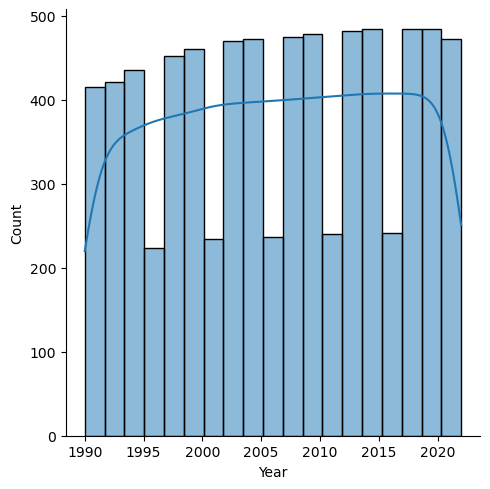

In [34]:
sns.displot( data=gdp_df["Year"], kde=True )

<Axes: xlabel='Year', ylabel='Density'>

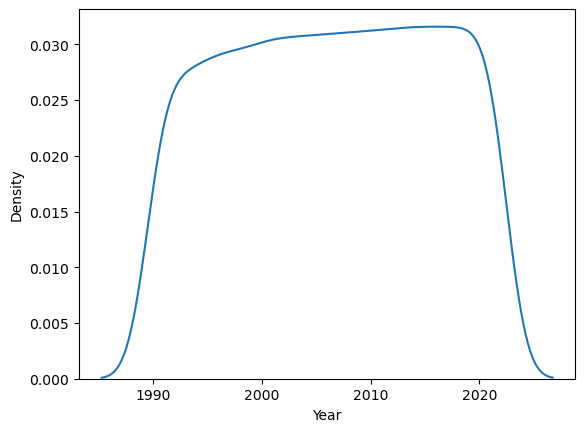

In [35]:
sns.kdeplot(data = gdp_df['Year'])

<Axes: xlabel='Year', ylabel='Country'>

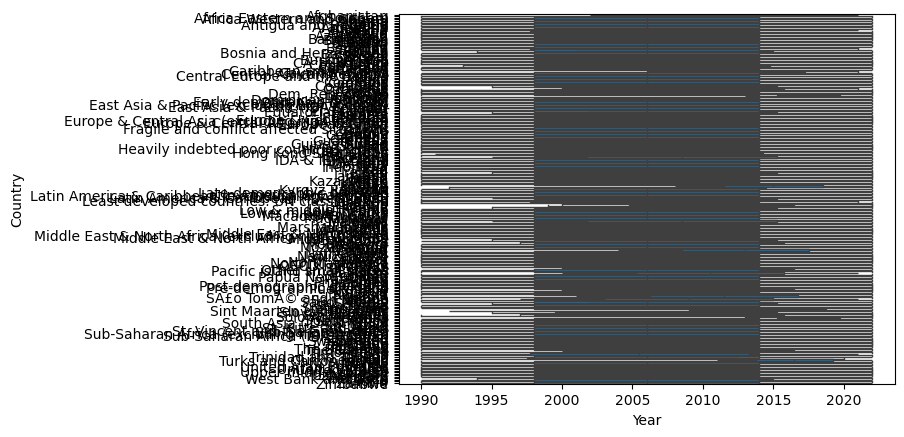

In [36]:
sns.boxplot( x=gdp_df["Year"], y=gdp_df["Country"] )

<Axes: xlabel='Year', ylabel='Country'>

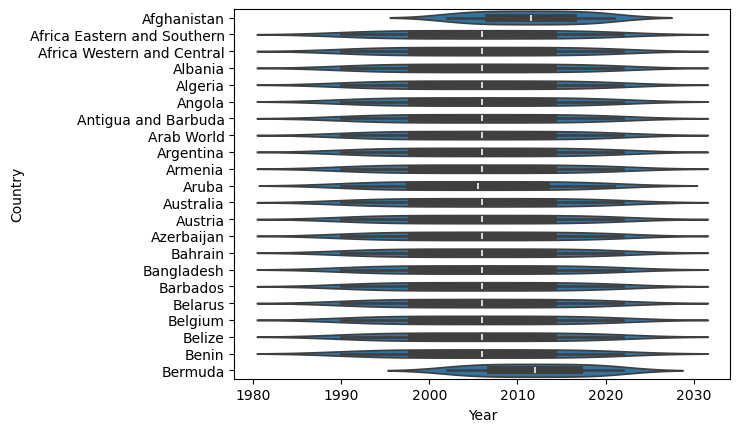

In [37]:
sns.violinplot(x=gdp_df["Year"], y=gdp_df.head(700)["Country"])

9. What was the median GDP per capita value in 2020? ANSWER: 13357.99

In [39]:
gdp_dfy = gdp_df.query('Year == 2020')
print(gdp_dfy.GDP_Per_Capita.median())

13357.997573370474


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [41]:
## decade column added to gdp_df.

In [42]:
gdp_decades = gdp_df.loc[(gdp_df.Year == 1990) | (gdp_df.Year == 2000) | (gdp_df.Year == 2010) | (gdp_df.Year == 2020)]

In [43]:
## boxplot

<Axes: >

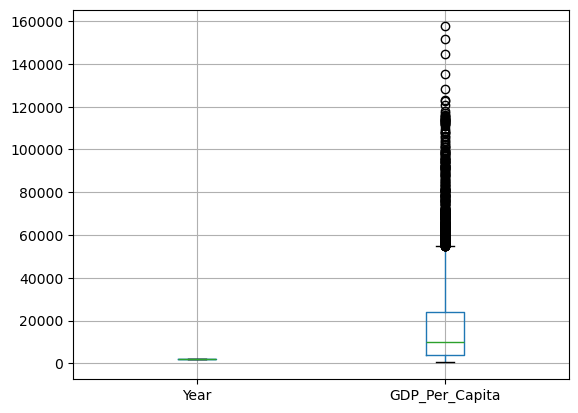

In [44]:
gdp_df.boxplot(column=['Year', 'GDP_Per_Capita']) 

In [45]:
## barplot

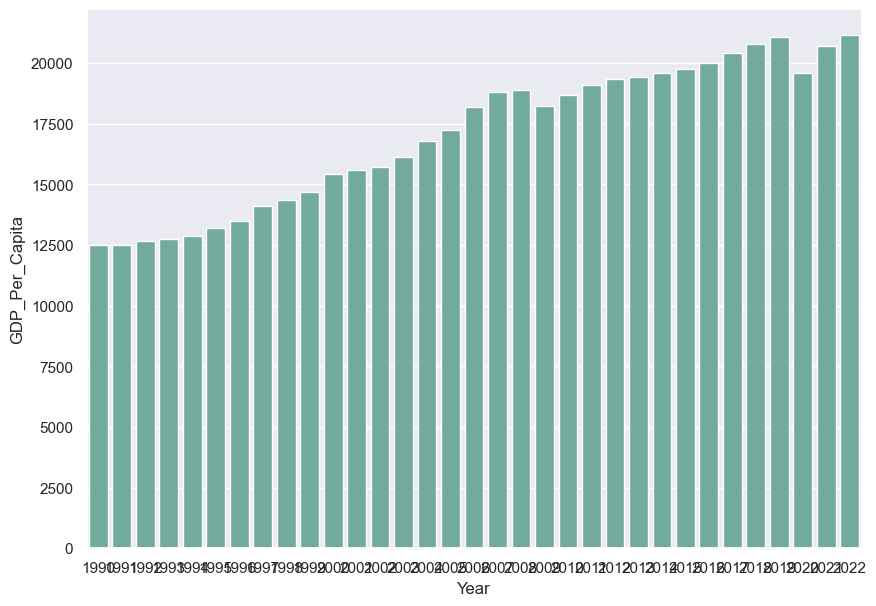

In [46]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot( x="Year", y="GDP_Per_Capita", data=gdp_df, errorbar=None, color='#69b3a2')

In [47]:
##  Scatterplot

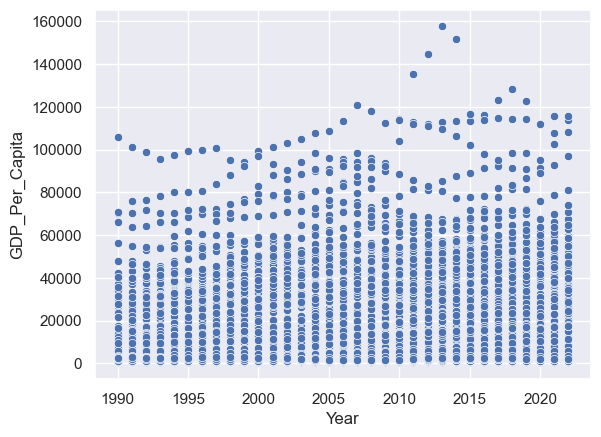

In [48]:
graph = sns.scatterplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"]);

In [49]:
## scatter plot with a trend line.

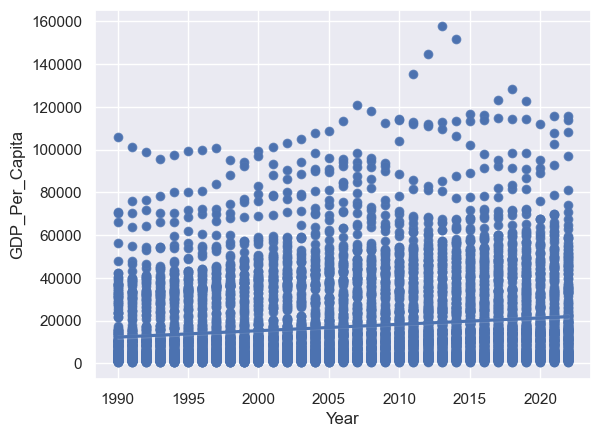

In [50]:
graph = sns.scatterplot(x=gdp_df["Year"], y=gdp_df["GDP_Per_Capita"])
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_df);

In [51]:
## Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [52]:
##  ANSWER:  The gdp has been stadily increaseing from 1990 to 2020.  Scatter plot with trend line is most accurate with most info for analysis.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [54]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
})

# Filter for values in column 'A' greater than 2
filtered_df = df[df['A'] > 2]

print(filtered_df)

   A   B
2  3  30
3  4  40
4  5  50


In [55]:
## ANSWER:  United Arab Emirates

filtered_gdp_df = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
gdp_df_sorted = filtered_gdp_df.sort_values(by='Year', ascending= True)
first_row = gdp_df_sorted.iloc[0]  # Access the row at index 0
print(first_row) 

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object


12. Which country had the highest GDP per capita in 2020?
    Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.
    ANSWER:  Luxembourg had the highest GDP per capita in 2020.

In [296]:
# Filtered to get the top GDP country in 2020.

gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_df_2020_sorted = gdp_df_2020.sort_values(by='GDP_Per_Capita', ascending=False)
gdp_df_2020_sorted_top = gdp_df_2020_sorted.head(1)
gdp_df_2020_sorted_top_rounded = gdp_df_2020_sorted_top.round(2)
print(gdp_df_2020_sorted_top_rounded)

         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020       111751.31


In [265]:
# Create a data set that only has Luxembourg in 2020.

gdp_df_2020_luxembourg = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [273]:
# Sort by Year

gdp_df_2020_luxembourg = gdp_df_2020_luxembourg.sort_values(by = 'Year')

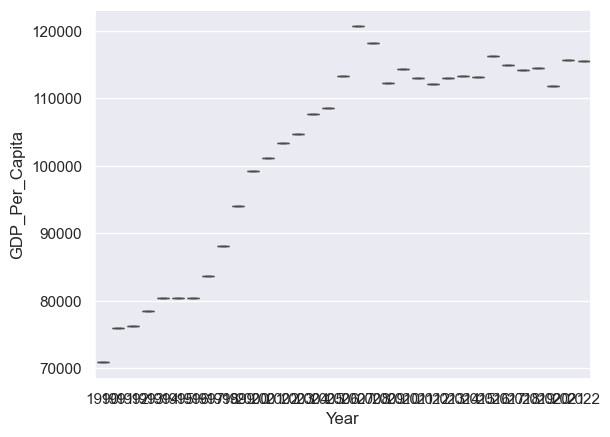

In [293]:
## Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

sns.boxplot( x = gdp_df_2020_luxembourg['Year'], y = gdp_df_2020_luxembourg['GDP_Per_Capita']);

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?